jupyter notebook for assignment 1

We are using 100k dataset

We are using pandas to load the data

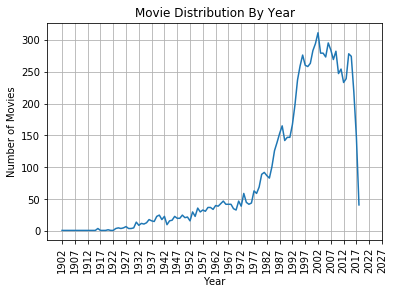

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf


def movies_per_year():
    movie_year = pd.read_csv('movieYear.csv')
    data = sqldf("SELECT yearReleased, count(*) as total FROM  movie_year  WHERE yearReleased>0 group by yearReleased "
                 "order by yearReleased")
    df = pd.DataFrame(data)
    years = df['yearReleased'].tolist()
    total = df['total'].tolist()
    plt.plot(years, total)
    plt.xticks(np.arange(min(years), max(years) + 10, 5), rotation=90)
    plt.grid()
    plt.ylabel("Number of Movies")
    plt.xlabel("Year")
    plt.title("Movie Distribution By Year")
    plt.show()
    
movies_per_year()

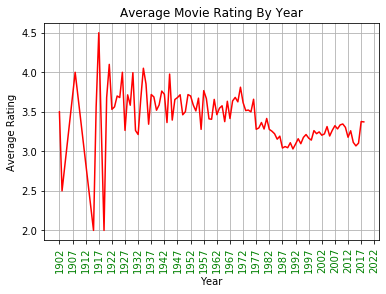

In [12]:
def rating_by_year():
    rating = pd.read_csv('ratings.csv')
    movie_year = pd.read_csv('movieYear.csv')
    rdata = sqldf("select movieId, avg(rating) as average from rating group by movieId")
    overall = sqldf(
        "select yr, avg(avgr) as average from (select rdata.average as avgr,movie_year.yearReleased as yr from rdata "
        "inner join movie_year on rdata.movieId = movie_year.movieId) as temp where yr>0 group by yr order by yr")
    year = overall['yr'].tolist()
    average = overall['average'].tolist()
    plt.plot(year, average, color='red')
    plt.xticks(np.arange(min(year), max(year) + 5, 5), c='green', rotation=90)
    plt.ylabel("Average Rating")
    plt.xlabel("Year")
    plt.title("Average Movie Rating By Year")
    plt.grid()
    plt.show()
    
rating_by_year()

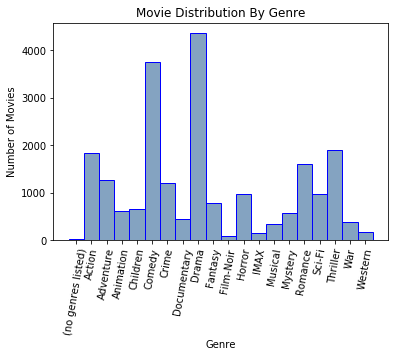

In [10]:
def genre_distribution():
    movie_genre = pd.read_csv('movieGenre.csv')
    data = sqldf("select genre, count(*) as total from movie_genre group by genre order by genre")
    df = pd.DataFrame(data)
    genre = df['genre'].tolist()
    total = df['total'].tolist()
    plt.bar(genre, total, width=1.0, facecolor=(0.2, 0.4, 0.6, 0.6), edgecolor='blue')
    plt.xticks(rotation=80)
    plt.ylabel("Number of Movies")
    plt.xlabel("Genre")
    plt.title("Movie Distribution By Genre")
    plt.show()
    
genre_distribution()

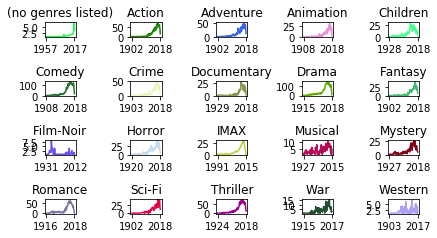

In [11]:
def genre_by_year():
    movie_genre = pd.read_csv('movieGenre.csv')
    movie_year = pd.read_csv('movieYear.csv')
    data_genre = sqldf("select genre, count(*) as total from movie_genre group by genre order by genre")
    df_genre = pd.DataFrame(data_genre)
    genre = df_genre['genre'].tolist()
    data_all = sqldf("select movie_genre.movieId,movie_genre.genre,movie_year.yearReleased from movie_genre inner "
                     "join movie_year on movie_genre.movieId = movie_year.movieId")
    fig = plt.figure()
    index = 1
    for entry in genre:
        data_list = sqldf(
            "select yearReleased, count(yearReleased) as total from data_all where genre like '" + entry + "' and yearReleased>0 group by yearReleased");
        year = data_list['yearReleased'].tolist()
        total = data_list['total'].tolist()
        ax = fig.add_subplot(5, 5, index)
        ax.plot(year, total, c=np.random.rand(3, ))
        plt.xticks(np.arange(min(year), max(year) + 5, max(year) - min(year)))
        ax.set_title(entry)
        index += 1
    plt.tight_layout()
    plt.show()
    
genre_by_year()

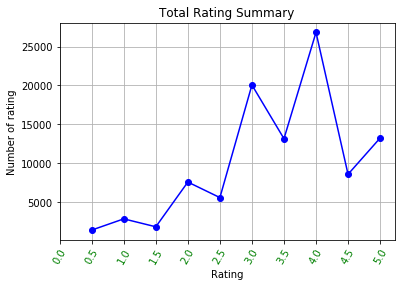

In [13]:
def rating_by_number():
    rating_df = pd.read_csv('ratings.csv')
    rat = sqldf("select rating, count(rating) as total from rating_df group by rating")
    rating = rat['rating'].tolist()
    total = rat['total'].tolist()
    plt.plot(rating, total, '-o', color='blue', )
    plt.xticks(np.arange(0, 5.5, 0.5), c='green', rotation=60)
    plt.ylabel("Number of rating")
    plt.xlabel("Rating")
    plt.title("Total Rating Summary")
    plt.grid()
    plt.show()
    
rating_by_number()